# Exercise Sheet 3 - Vector Space Models and Word Embeddings - Solutions


# Learning Objectives
    - Introduction to word vectors
    - Overview on distributional semantics
--------------------


In [ ]:
# setting the stage ;)
import nltk
nltk.download('all')

# Preprocessing: Tokenization & POS tagging

In [2]:
# Sentence tokenization with nltk
import nltk

sentence = "The quick brown fox jump|jumps over the lazy dog."
tokens = nltk.word_tokenize(sentence)

print(tokens)

['The', 'quick', 'brown', 'fox', 'jump|jumps', 'over', 'the', 'lazy', 'dog', '.']


In [3]:
# Part-of-Speech (POS) Tagging

tagged = nltk.pos_tag(tokens)
print(tagged)

[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jump|jumps', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


### Exercise 1: How to get rid of the punctuations from the text?

In [ ]:
import string

text = "Remember, remember, the fifth of November, Gunpowder, treason and plot! If you can't give us one, we'll take two; The better for us and the worse for you!"
tokens = nltk.word_tokenize(text)

# Your code goes here
refined_tokens = [token for token in tokens if token not in string.punctuation]

print(refined_tokens)

['Remember', 'remember', 'the', 'fifth', 'of', 'November', 'Gunpowder', 'treason', 'and', 'plot', 'If', 'you', 'ca', "n't", 'give', 'us', 'one', 'we', "'ll", 'take', 'two', 'The', 'better', 'for', 'us', 'and', 'the', 'worse', 'for', 'you']


Hint: a list of punctuations could be used (Check string.punctuation on https://docs.python.org/3/library/string.html)

----
# Distributional Semantics & Word Vectors


## Context Words

### Exercise 2: looks up every occurrence of the word "affection" and prints out it's context in the text of Sense and Sensibility by Jane Austen

In [ ]:
# Import books from nltk for further processing
from nltk.book import *

In [ ]:
# Your code goes here
text2.concordance("affection")

Displaying 25 of 79 matches:
, however , and , as a mark of his affection for the three girls , he left them
t . It was very well known that no affection was ever supposed to exist between
deration of politeness or maternal affection on the side of the former , the tw
d the suspicion -- the hope of his affection for me may warrant , without impru
hich forbade the indulgence of his affection . She knew that his mother neither
rd she gave one with still greater affection . Though her late conversation wit
 can never hope to feel or inspire affection again , and if her home be uncomfo
m of the sense , elegance , mutual affection , and domestic comfort of the fami
, and which recommended him to her affection beyond every thing else . His soci
ween the parties might forward the affection of Mr . Willoughby , an equally st
 the most pointed assurance of her affection . Elinor could not be surprised at
he natural consequence of a strong affection in a young and ardent mind . This 
 opinion . 

Hint: We have already done that in Exercise Sheet 1.1 using NLTK.

## n-grams

In [ ]:
from nltk.util import ngrams

text = "You shall know a word by the company it keeps meaning - Firth (1957)"
tokenize = nltk.word_tokenize(text)

In [ ]:
# show all possible n-grams
bigrams = ngrams(tokenize,2)
for b in bigrams:
    print(b)

('You', 'shall')
('shall', 'know')
('know', 'a')
('a', 'word')
('word', 'by')
('by', 'the')
('the', 'company')
('company', 'it')
('it', 'keeps')
('keeps', 'meaning')
('meaning', '-')
('-', 'Firth')
('Firth', '(')
('(', '1957')
('1957', ')')


### Frequency of occurence for each bigram

In [11]:
#### showing n-grams with raw frequency

from nltk.collocations import *
import nltk# for sent in tokens:
#   refined_token = [token for token in sent if token not in string.punctuation]
#You should tokenize your text
text = "The cat lies on the mat's and a dog! lies on the floor"
tokens = nltk.word_tokenize(text)
print(tokens)
bigrams = BigramCollocationFinder.from_words(tokens)
for bigram, freq in bigrams.ngram_fd.items():  
      print(bigram, freq)

['The', 'cat', 'lies', 'on', 'the', 'mat', "'s", 'and', 'a', 'dog', '!', 'lies', 'on', 'the', 'floor']
('The', 'cat') 1
('cat', 'lies') 1
('lies', 'on') 2
('on', 'the') 2
('the', 'mat') 1
('mat', "'s") 1
("'s", 'and') 1
('and', 'a') 1
('a', 'dog') 1
('dog', '!') 1
('!', 'lies') 1
('the', 'floor') 1


In [ ]:
# show n-grams measured using Pointwise Mutual Information

from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#finder = BigramCollocationFinder.from_words(nltk.corpus.genesis.words('english-web.txt'))
finder = BigramCollocationFinder.from_words(text1)

finder.nbest(bigram_measures.pmi, 10)

[(',)', 'Star'),
 ('.--"', 'Whose'),
 ('103', 'Measurement'),
 ('11', 'Nightgown'),
 ('12', 'Biographical'),
 ('29', 'Enter'),
 ('37', 'Sunset'),
 ('38', 'Dusk'),
 ('46', 'Surmises'),
 ('58', 'Brit')]

... making PMI more interpretable, print out only n-grams which apear about a certain threshold 

In [ ]:
freq_threshold = 30
finder = BigramCollocationFinder.from_words(text1)
finder.apply_freq_filter(freq_threshold)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('!"', 'cried'),
 ('each', 'other'),
 (',"', 'cried'),
 ('on', 'board')]

### Exercise 3: Interpret the variation in pmi based on frequency threshold?

In [ ]:
# Your code goes here
freq_threshold = 100
finder = BigramCollocationFinder.from_words(text1)
finder.apply_freq_filter(freq_threshold)
finder.nbest(bigram_measures.pmi, 10)

[('Sperm', 'Whale'),
 (',"', 'said'),
 ('?"', '"'),
 ('have', 'been'),
 ('don', "'"),
 ("'", 'll'),
 ("'", 's'),
 ('at', 'last'),
 ("'", 't'),
 ('had', 'been')]

In [ ]:
# Your code goes here
freq_threshold = 10
finder = BigramCollocationFinder.from_words(text1)
finder.apply_freq_filter(freq_threshold)
finder.nbest(bigram_measures.pmi, 10)

[('.*', '*'),
 ('Cape', 'Horn'),
 ('New', 'Bedford'),
 ('Moby', 'Dick'),
 ('she', 'blows'),
 (",'", 'says'),
 (".'", '"\''),
 ('chief', 'mate'),
 ('years', 'ago'),
 ('lower', 'jaw')]

Hint: Change frequency threshold to 100 and 10

*Please write your interpretation here*

Frequency threshold is a limit below which all the co-occurrences are ignored. If we set it as 30, then all the bigram co-occurrences that lie below 30 are ignored. 
We can see if we go on either extreme i.e. 10 or 100, we tend to get the less important bigrams that may occur less frequently (10) or more frequency (100). 
This frequency threshold is a term frequency of a given bigram.
Furthermore, you can read more about term frequency (tf) and inverse document frequency (idf). 

## Pointwise Mutual Information (PMI)

In [ ]:
import nltk
from nltk.collocations import *
from nltk.tokenize import word_tokenize

text = "eat sleep code repeat sleep dream code repeat"

Bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(text))

for i in finder.score_ngrams(Bigram_measures.pmi):
    print(i)

(('code', 'repeat'), 2.0)
(('dream', 'code'), 2.0)
(('eat', 'sleep'), 2.0)
(('sleep', 'dream'), 2.0)
(('repeat', 'sleep'), 1.0)
(('sleep', 'code'), 1.0)


### Exercise 4: What role does PMI may play in language modelling?

*Please write your answer here*

If PMI of the given bigram is more then they are more likely to occur together in the wild. Hence, we can leverage this while assigning the conditional probability of a word based on its context (previous word). Likewise, the probability of the sentence can be calculated which is the multiplication of probabilities of each word in a sentence.


# Word Vectors

In [12]:
# example of a sparse word vector

from sklearn.feature_extraction.text import CountVectorizer
 
corpus = [
'All my cats in a row.',
'When my cat sits down, she looks like a Furby toy!',
'The cat from outer space',
'Sunshine loves to sit like this for some reason.'
]
vectorizer = CountVectorizer()
print(vectorizer.toarray())
print(vectorizer.vocabulary_)

AttributeError: 'CountVectorizer' object has no attribute 'toarray'

### Exercise 5: Write your intepretation of above vector representation

*Please write your answer here*

It's a vector representation of each sentence based on the vocabulary in Corpus. Each column represents a word from the vocabulary and 1 indicates presence or absence of that word. 
E.g. Word "cat" has an index 1. As it is present in sentences 2 and 3, we can see value 1 at index 1 of both sentences.  

## Word Co-occurrence Matrix in sparse CRS (Compressed Sparse Row) format



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

docs = ['the cat lies on the map',
        'the cat lies on the floor',
        'an cat sits near the floor']
        
# create your bag of words model using only unigrams
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)

# print the vocab & thier corrosponding index
print(count_model.vocabulary_)

# print the BOW
print(X)

# Co-occurance matrix calculation

X[X > 0] = 1 # run this line if you don't want extra within-text cooccurence if
# you don't want co-occurrence that are spurious from the own text, set 
# occurrence that is greater that 1 to 1

Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format

Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0

# print out matrix in dense format
print(Xc.todense()) 


{'the': 8, 'cat': 1, 'lies': 3, 'on': 6, 'map': 4, 'floor': 2, 'an': 0, 'sits': 7, 'near': 5}
  (0, 8)	2
  (0, 1)	1
  (0, 3)	1
  (0, 6)	1
  (0, 4)	1
  (1, 8)	2
  (1, 1)	1
  (1, 3)	1
  (1, 6)	1
  (1, 2)	1
  (2, 8)	1
  (2, 1)	1
  (2, 2)	1
  (2, 0)	1
  (2, 7)	1
  (2, 5)	1
[[0 1 1 0 0 1 0 1 1]
 [1 0 2 2 1 1 2 1 3]
 [1 2 0 1 0 1 1 1 2]
 [0 2 1 0 1 0 2 0 2]
 [0 1 0 1 0 0 1 0 1]
 [1 1 1 0 0 0 0 1 1]
 [0 2 1 2 1 0 0 0 2]
 [1 1 1 0 0 1 0 0 1]
 [1 3 2 2 1 1 2 1 0]]


### Exercise 6: Explain the matrix!

*Write your answer here*

It’s a co-occurrence matrix, showing how words appear in the corpus (docs) given a specific context window. In this example unigrams are used (window of 1 word after and before). The word "an" index=0, and "cat" index=1 appeared once in the same context.

# Word2Vec

Mikolov, Tomas; et al. "Efficient Estimation of Word Representations in Vector Space". arXiv:1301.3781

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.[Wikipedia]

In [ ]:
# gensim - open-source vector space modeling and topic modeling toolkit

import gensim
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())
model.save('brown.embedding')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
new_model = gensim.models.Word2Vec.load('brown.embedding')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# word vector dimensionality

len(new_model['university'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


100

In [ ]:
# show word similarity between words, calculated on the non-zero word vectors

new_model.similarity('university','school')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.84544945

### Exercise 7: Calculate and interpret the similarity between (bank, river) and (bank, deposit)? How will you handle word sense disambiguation?

In [ ]:
# Your code goes here
print(new_model.similarity('bank','river'))
print(new_model.similarity('bank','deposit'))


0.92647356
0.8754487


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


*Your answer goes here*

Wordnet could be used to avoid ambiguity.Check http://wordnetweb.princeton.edu/perl/webwn?o2=&o0=1&o8=1&o1=1&o7=&o5=&o9=&o6=&o3=&o4=&s=bank&i=0&h=000000000000000000#c

In [ ]:
# # download the Google newsW1v model from 
! wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz" # This may take a while depending upon your internet speed

--2020-09-28 17:11:35--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.80.14
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.80.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.2MB/s    in 1m 48s  

2020-09-28 17:13:24 (14.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
# Mount your drive to the colab notebook
# To avoid multiple downloads, we mount the drive

from google.colab import drive
drive.mount("/content/drive") #authorization is required here

# If this does not work you may execute next cell

Mounted at /content/drive


In [ ]:
from nltk.data import find
import gensim
from gensim.models.word2vec import Word2Vec

# Uncomment this code if you are using drive mount
# Mention path where GoogleNews-vectors-negative300.bin.gz file is downloaded (it should be on the same loacation where your colab notebook is)
filename = '/content/drive/My Drive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz'

## Uncomment if drive mount did not work for you
# filename = 'GoogleNews-vectors-negative300.bin.gz'

model = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=True)



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# number of entries in the Word2Vec matrix

len(model.vocab)

3000000

In [ ]:
# dimensionality of of the dense word vectors

len(model['university'])

300

In [ ]:
# most similar words based on Word2Vec

model.most_similar(positive=['soccer'], topn = 10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Soccer', 0.7622618675231934),
 ('football', 0.7313547730445862),
 ('basketball', 0.681098461151123),
 ('volleyball', 0.664727509021759),
 ('softball', 0.6443414688110352),
 ('lacrosse', 0.643805980682373),
 ('water_polo', 0.6297686100006104),
 ('hockey', 0.6270937919616699),
 ('tennis', 0.6163382530212402),
 ('futbol', 0.6026160717010498)]

In [ ]:
# most dissimilar entry among provided words

model.doesnt_match('wrestling cooking dinner potato'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'wrestling'

## Vector operations

In [ ]:
model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071)]

In [ ]:
model.most_similar(positive=['Delhi','Russia'], negative=['Mosco'], topn = 1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('India', 0.6403084993362427)]

### Excercise 8: Can you think of similar examples?

Actor - male + female?

batman - bat + spider?

summer - sun + cold?

*Guess the result here before executing the code*

In [ ]:
# Your code goes here
print(model.most_similar(positive=['Actor','female'], negative=['male'], topn = 1))
print(model.most_similar(positive=['batman','spider'], negative=['man'], topn = 1))
print(model.most_similar(positive=['summer','cold'], negative=['sun'], topn = 1))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Actress', 0.7435436844825745)]
[('spiders', 0.5383533835411072)]
[('winter', 0.5884253978729248)]


# Visualizing Vector Space

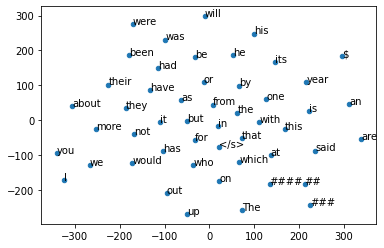

In [ ]:
import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model['university'])))

for term in model.vocab:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()
